In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/content/House Price India.csv.zip')
df.drop(['id','Date'], axis=1, inplace=True)
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [2]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [3]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 20)

 shape of X_test - (2924, 20)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



In [4]:
number_of_features = len(X.columns)

model = Sequential()

model.add(layer=Input(shape=number_of_features))

model.add(layer=Dense(units=2048, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=16, activation='relu'))

model.add(layer=Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              43008     
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
366/366 [==============================] - 5s 9ms/step - loss: 111541796864.0000 - mae: 214538.5469 - mape: 47.4006
Epoch 2/100
366/366 [==============================] - 4s 11ms/step - loss: 59362631680.0000 - mae: 162833.3594 - mape: 34.0659
Epoch 3/100
366/366 [==============================] - 3s 9ms/step - loss: 56518635520.0000 - mae: 159532.7500 - mape: 33.4990
Epoch 4/100
366/366 [==============================] - 3s 9ms/step - loss: 56541290496.0000 - mae: 157970.8281 - mape: 33.0283
Epoch 5/100
366/366 [==============================] - 4s 10ms/step - loss: 54681022464.0000 - mae: 156823.2500 - mape: 32.8326
Epoch 6/100
366/366 [==============================] - 4s 10ms/step - loss: 56673521664.0000 - mae: 160041.5156 - mape: 33.5505
Epoch 7/100
366/366 [==============================] - 3s 9ms/step - loss: 54316441600.0000 - mae: 156310.3125 - mape: 32.6296
Epoch 8/100
366/366 [==============================] - 3s 9ms/step - loss: 55312543744.0000 - mae: 157883.1

In [6]:
y_pred = model.predict(X_test)

92/92 [==============================] - 0s 2ms/step


In [7]:
y_pred

array([[384660.06],
       [464021.12],
       [323783.94],
       ...,
       [447353.84],
       [337339.28],
       [508215.22]], dtype=float32)

In [8]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: Price, Length: 2924, dtype: int64

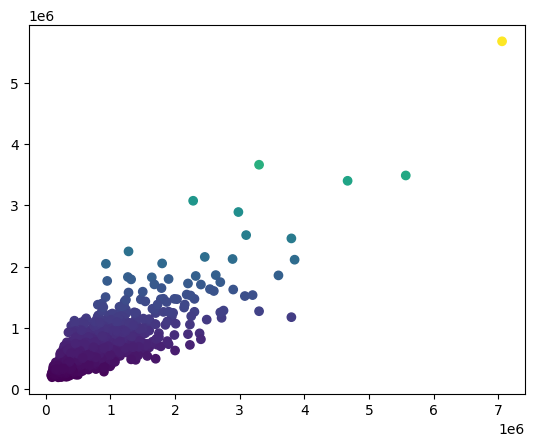

In [9]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [10]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

,Actual Value,Predicted Value
0,640000,384660.06250
1,650000,464021.12500
2,325000,323783.93750
3,373000,491775.68750
4,355000,527150.00000
...,...,...
2919,497000,580194.37500
2920,400000,363979.68750
2921,366750,447353.84375
2922,276000,337339.28125


In [11]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

66.53922026766892